In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books=pd.read_csv("books.csv")
ratings=pd.read_csv("ratings.csv")
to_read=pd.read_csv("to_read.csv")

In [3]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [6]:
books.sort_values(by = 'ratings_count', ascending = False)[['original_title','ratings_count', 'average_rating' ]][0:10]


,original_title,ratings_count,average_rating
0,The Hunger Games,4780653,4.34
1,Harry Potter and the Philosopher's Stone,4602479,4.44
2,Twilight,3866839,3.57
3,To Kill a Mockingbird,3198671,4.25
4,The Great Gatsby,2683664,3.89
5,The Fault in Our Stars,2346404,4.26
6,The Hobbit or There and Back Again,2071616,4.25
7,The Catcher in the Rye,2044241,3.79
9,Pride and Prejudice,2035490,4.24
8,Angels & Demons,2001311,3.85


In [7]:
most_ratings = books.sort_values(by = 'ratings_count', ascending = False)[['original_title','ratings_count', 'average_rating', 'image_url' ]][0:10]


In [8]:
import pandas as pd
from IPython.display import Image, HTML
most_ratings['img_html'] = most_ratings['image_url']\
    .str.replace(
        '(.*)', 
        '<img src="\\1" style="max-height:124px;"></img>'
    )
with pd.option_context('display.max_colwidth', 10000):
  
  display(HTML(most_ratings[['original_title', 'img_html', 'ratings_count', 'average_rating' ]].to_html(escape=False)))

,original_title,img_html,ratings_count,average_rating
0,The Hunger Games,,4780653,4.34
1,Harry Potter and the Philosopher's Stone,,4602479,4.44
2,Twilight,,3866839,3.57
3,To Kill a Mockingbird,,3198671,4.25
4,The Great Gatsby,,2683664,3.89
5,The Fault in Our Stars,,2346404,4.26
6,The Hobbit or There and Back Again,,2071616,4.25
7,The Catcher in the Rye,,2044241,3.79
9,Pride and Prejudice,,2035490,4.24
8,Angels & Demons,,2001311,3.85


In [9]:
books.average_rating=books.average_rating.astype('float')

In [10]:
books.sort_values(by='average_rating',ascending=False)[['original_title','ratings_count','average_rating']][:10]

,original_title,ratings_count,average_rating
3627,The Complete Calvin and Hobbes,28900,4.82
3274,NaN,33220,4.77
861,Words of Radiance,73572,4.77
8853,Mark of the Lion Trilogy,9081,4.76
7946,NaN,8953,4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,22351,4.75
6360,There's Treasure Everywhere: A Calvin and Hobb...,16766,4.74
421,Complete Harry Potter Boxed Set,190050,4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",24618,4.73
6919,The Indispensable Calvin and Hobbes: A Calvin ...,14597,4.73


In [11]:
high_rating_books = books.sort_values(by = 'average_rating', ascending = False)[['original_title','ratings_count','image_url', 'average_rating' ]][0:10]

In [12]:
high_rating_books['img_html'] = high_rating_books['image_url']\
    .str.replace(
        '(.*)', 
        '<img src="\\1" style="max-height:124px;"></img>'
    )
with pd.option_context('display.max_colwidth', 10000):
  
  display(HTML(high_rating_books[['original_title', 'img_html','ratings_count', 'average_rating' ]].to_html(escape=False)))

,original_title,img_html,ratings_count,average_rating
3627,The Complete Calvin and Hobbes,,28900,4.82
3274,NaN,,33220,4.77
861,Words of Radiance,,73572,4.77
8853,Mark of the Lion Trilogy,,9081,4.76
7946,NaN,,8953,4.76
4482,It's a Magical World: A Calvin and Hobbes Collection,,22351,4.75
6360,There's Treasure Everywhere: A Calvin and Hobbes Collection,,16766,4.74
421,Complete Harry Potter Boxed Set,,190050,4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",,24618,4.73
6919,The Indispensable Calvin and Hobbes: A Calvin and Hobbes Treasury,,14597,4.73


In [13]:
authors_with_most_books=pd.DataFrame(books.authors.value_counts()[0:10]).reset_index()
authors_with_most_books.columns=['author','number_of_books']
authors_with_most_books

,author,number_of_books
0,Stephen King,60
1,Nora Roberts,59
2,Dean Koontz,47
3,Terry Pratchett,42
4,Agatha Christie,39
5,Meg Cabot,37
6,James Patterson,36
7,David Baldacci,34
8,John Grisham,33
9,J.D. Robb,33


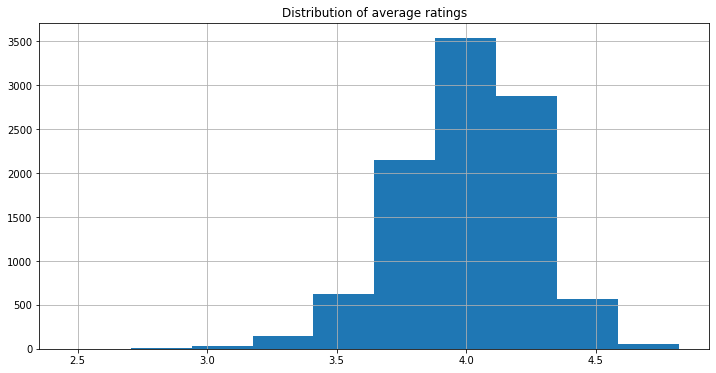

In [14]:
plt.figure(figsize=(12,6))
plt.title('Distribution of average ratings')
books['average_rating'].hist()
display()

In [15]:
ratings.shape

(981756, 3)

In [16]:
train,test

In [17]:
test=ratings[785404:]

In [18]:
from pyspark.ml.evaluation import RegressionEvaluator

In [19]:
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

In [22]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Recommendation_system').getOrCreate()

In [23]:
als = ALS( userCol="user_id", itemCol="book_id", ratingCol="rating",
 coldStartStrategy="drop", nonnegative = True, implicitPrefs = False)

In [24]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

param_grid = ParamGridBuilder() \
 .addGrid(als.rank, [10, 50, 75, 100]) \
 .addGrid(als.maxIter, [5, 50, 75, 100]) \
 .addGrid(als.regParam, [.01, .05, .1, .15]) \
 .build()

evaluator=RegressionEvaluator(metricName="rmse",labelCol="rating",predictionCol="prediction")
print("Number of models to be tested using param_grid:",len(param_grid))

Number of models to be tested using param_grid: 64


In [25]:
Cv=CrossValidator(estimator=als,estimatorParamMaps=param_grid,evaluator=evaluator,numFolds=5)

In [31]:
from pyspark.sql import SQLContext
sqlContext=SQLContext(spark)
training=sqlContext.createDataFrame(train)
test=sqlContext.createDataFrame(test)

In [39]:
model = als.fit(training)


In [40]:

predictions=model.transform(test)
predictions.show(4)

+-------+-------+------+----------+
|book_id|user_id|rating|prediction|
+-------+-------+------+----------+
|   7920|  26801|     4| 4.0590825|
|   7920|  31207|     4| 3.6747599|
|   7920|  21508|     5| 4.1448445|
|   7920|  32087|     4| 2.4250839|
+-------+-------+------+----------+
only showing top 4 rows



In [41]:
predictions.createOrReplaceTempView("predictions")

In [42]:
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 1.0789182573007994
